# 1. Importing Required Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Load the dataset into the tool

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
numerical_features

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
categorical_features 

Index(['Gender'], dtype='object')

# 3. Perform Below Visualizations

<AxesSubplot:>

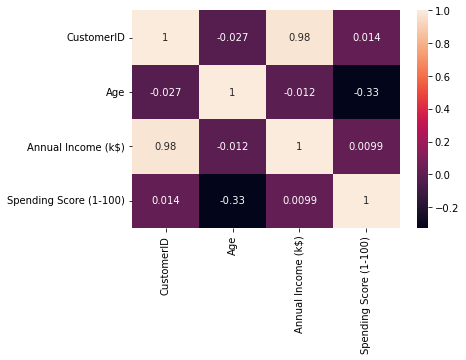

In [13]:
df.corr()
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

In [14]:
data=df
data = np.random.randint(low=1,high=100,size=(10,10))
print(data)

[[35 46 34 15 20 93 29  4 90  6]
 [83 69 22 46 73 25 34 96 23 63]
 [ 6 37 71 98  7 87 20  4 47 60]
 [20 73 85 10 52 33 58 28 26 88]
 [67 48 47 68  8 42  1 14 21 28]
 [56 54 80 96  7 60 37 68 36 43]
 [ 8 48 64 10  7 70 51  7 90 36]
 [31 24 64 18  6 34  7 37 28 34]
 [30 24 51 90 88  7 35 53  7 50]
 [29 89 50 59 70 13 16  6 51 53]]


# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

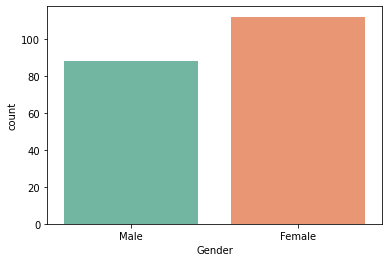

In [15]:
sns.countplot(df.Gender , data = df, palette = 'Set2')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

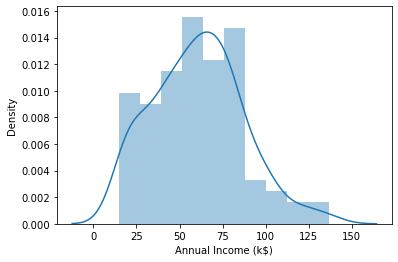

In [16]:
sns.distplot(df['Annual Income (k$)'])


(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

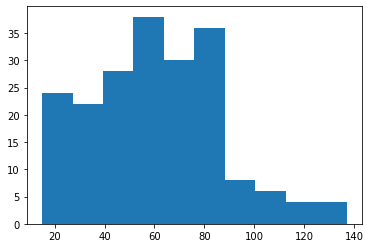

In [18]:
plt.hist(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

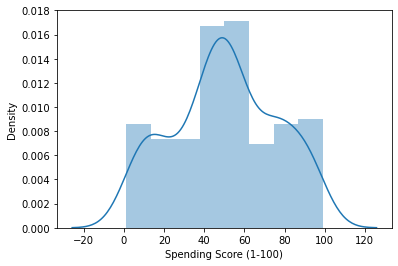

In [19]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

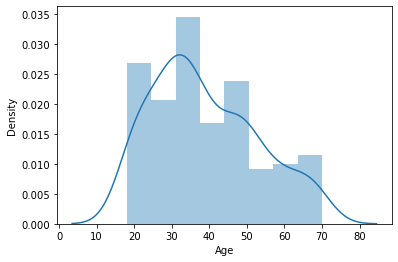

In [20]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

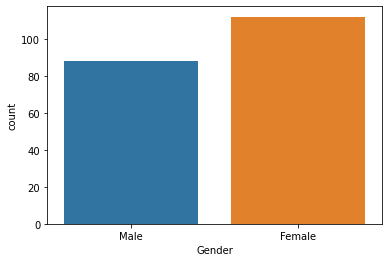

In [23]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

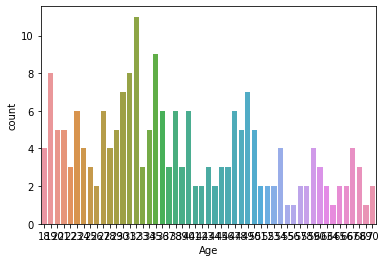

In [24]:
sns.countplot(df['Age'])

# Bi- Variate Analysis

<Figure size 864x720 with 0 Axes>

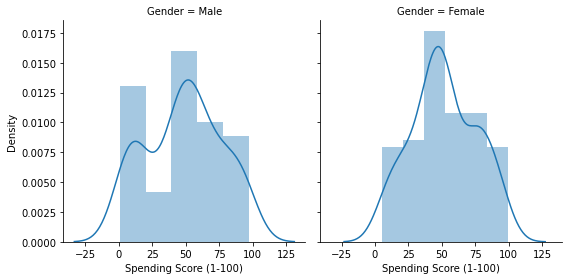

In [21]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Spending Score (1-100)')

<Figure size 864x720 with 0 Axes>

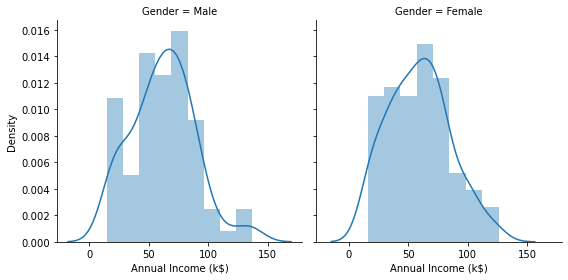

In [25]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Annual Income (k$)')

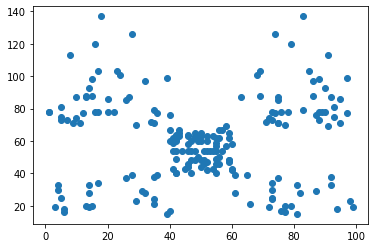

In [26]:
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])

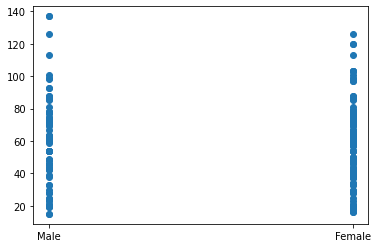

In [27]:
plt.scatter(df['Gender'],df['Annual Income (k$)'])

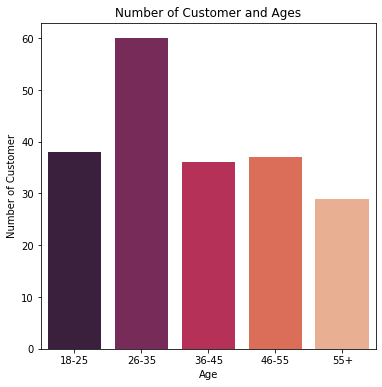

In [28]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(6,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

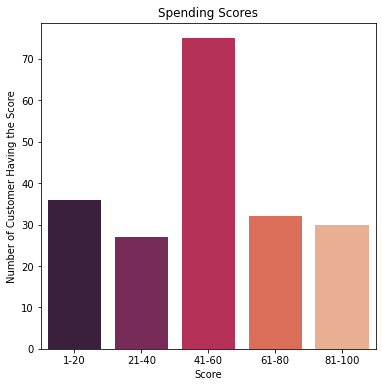

In [29]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(6,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

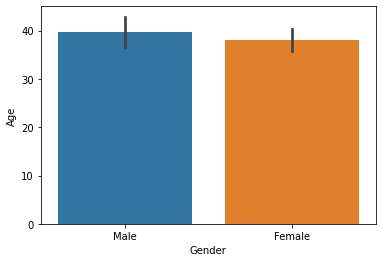

In [30]:
sns.barplot(df['Gender'], df['Age'])

# Multi-Variate Analysis

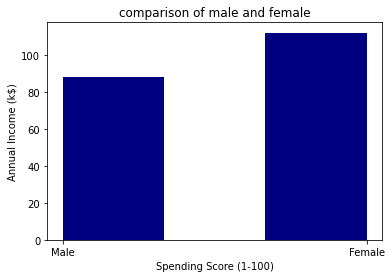

In [31]:
plt.hist(x = df.Gender, bins = 3, color = 'navy')
plt.title('comparison of male and female')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

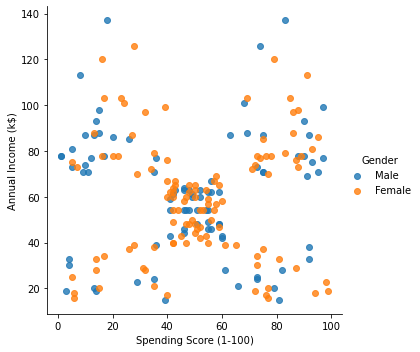

In [32]:
sns.lmplot("Spending Score (1-100)","Annual Income (k$)", df, hue="Gender", fit_reg=False);

Text(0.5, 1.0, 'Age vs Spending Score and Gender')

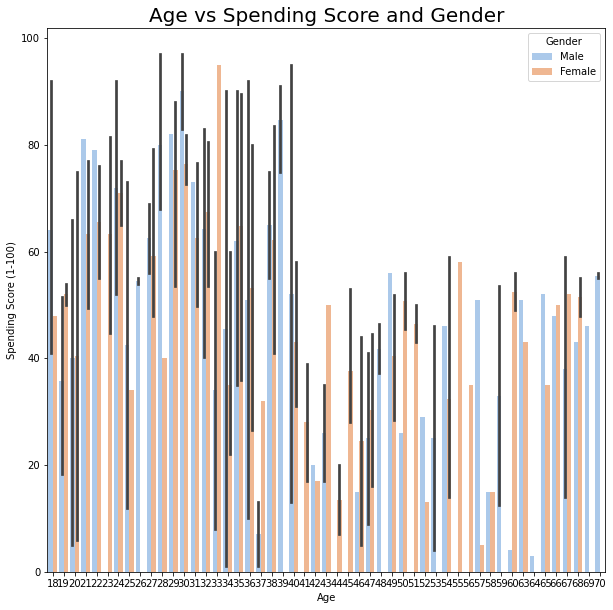

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(df['Age'], df['Spending Score (1-100)'], hue = df['Gender'], palette = 'pastel')
plt.title('Age vs Spending Score and Gender', fontsize = 20)

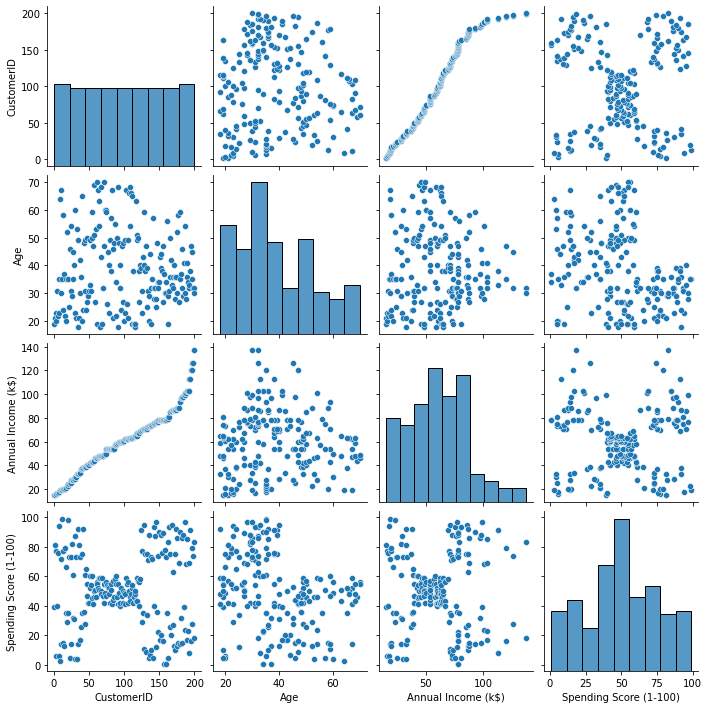

In [34]:
sns.pairplot(df)

# Pairplot Analysis

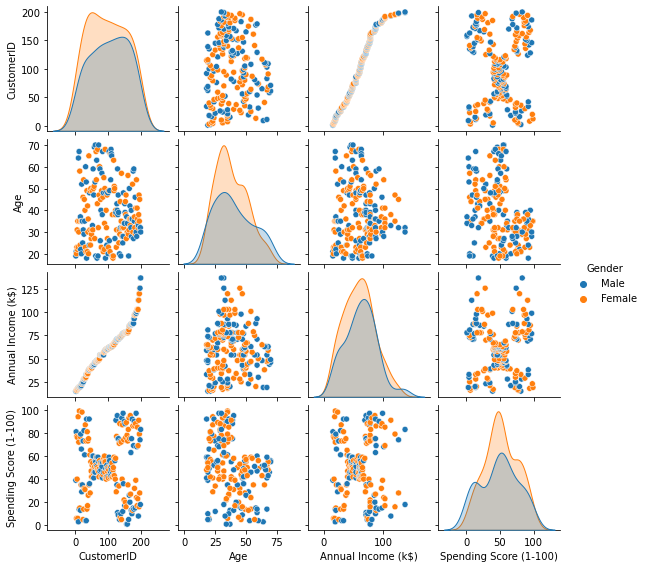

In [35]:
sns.pairplot(df,hue='Gender',size=2)

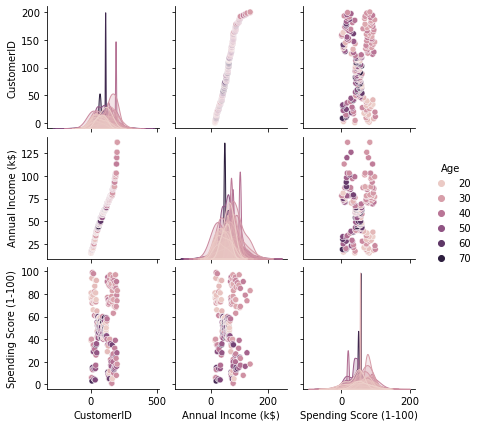

In [36]:
sns.pairplot(df,hue='Age',size=2)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

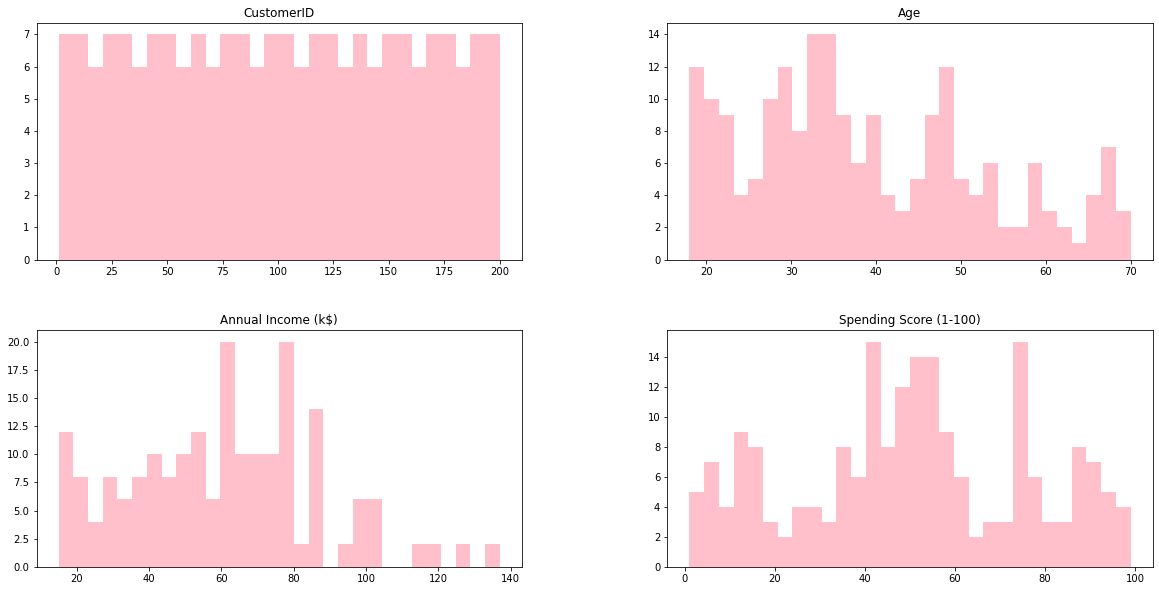

In [37]:
df.hist(figsize=(20,10), grid=False, layout=(2, 2), bins = 30 , color = "pink" )

# 4. Perform descriptive statistics on the dataset

In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [40]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [41]:
df.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [42]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [43]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [44]:
df.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# 5. Check for Missing values and deal with them.

In [45]:
df.isna().sum() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

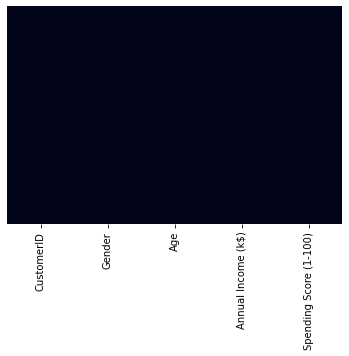

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# 6.Find the outliers and replace them outliers

# Boxplot

<AxesSubplot:xlabel='CustomerID'>

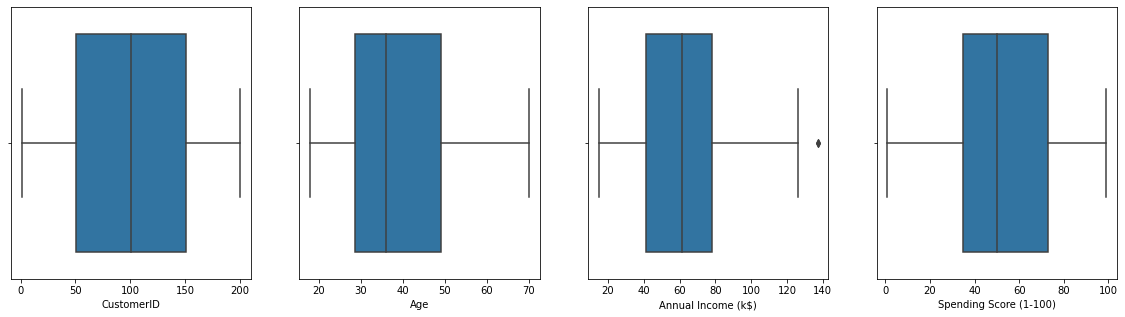

In [49]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=df['CustomerID'])

# Histogram

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

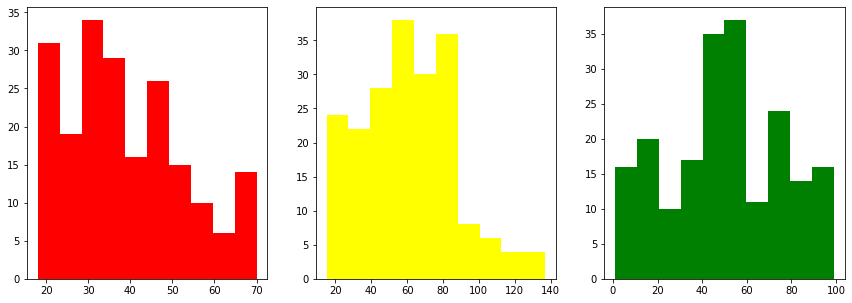

In [50]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 1)
plt.hist(x=df['Age'],color = "red" )

plt.subplot(1, 5, 2)
plt.hist(x=df['Annual Income (k$)'],color = "yellow" )

plt.subplot(1, 5, 3)
plt.hist(x=df['Spending Score (1-100)'],color = "green" )

# Skewness

In [51]:
print('skewness value of Age: ',df['Age'].skew())

skewness value of Age:  0.48556885096681657


In [52]:
print('skewness value of Annual Income: ',df['Annual Income (k$)'].skew())

skewness value of Annual Income:  0.3218425498619055


In [53]:
print('skewness value of Spending Score: ',df['Spending Score (1-100)'].skew())

skewness value of Spending Score:  -0.047220201374263374


# Interquartile Range

In [54]:
quantile = df.quantile(q = [0.25, 0.75])
quantile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [55]:
quantile.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [57]:
quantile.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [58]:
IQR = quantile.iloc[1] - quantile.iloc[0]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [59]:
upper = quantile.iloc[1] + (1.5 *IQR)
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [61]:
lower = quantile.iloc[0] - (1.5* IQR)
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [62]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

# Outliers Treatment

<AxesSubplot:xlabel='CustomerID'>

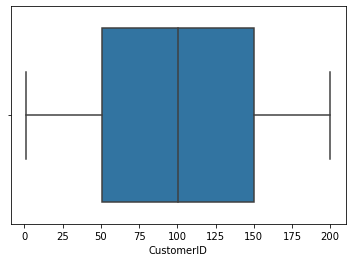

In [63]:
sns.boxplot(df['CustomerID'])

In [64]:
df['Annual Income (k$)'].max()

137

<AxesSubplot:xlabel='Age'>

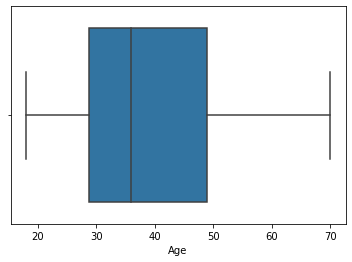

In [65]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)'>

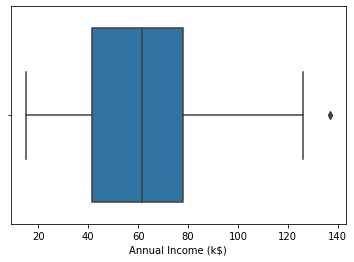

In [66]:
sns.boxplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

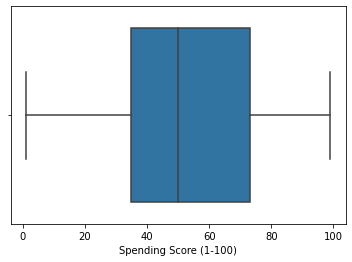

In [67]:
sns.boxplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

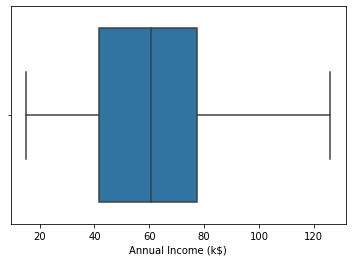

In [68]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > 132.750, 60.55, df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [70]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [72]:
df['Gender'].unique()


array([1, 0], dtype=int64)

In [76]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# 8. Scaling the data

In [77]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(df),columns= df.columns)
x_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959


# 9. Perform any of the clustering algorithms

In [78]:
from sklearn.cluster import KMeans
error = []
k = list(range(2,9))

for i in k:
  kmeans = KMeans(n_clusters = i , init = 'k-means++')
  kmeans.fit(df)
  error.append(kmeans.inertia_)
error

[381507.64738523844,
 268062.5543374743,
 191550.08627670945,
 153530.68956249495,
 119166.15727643932,
 101320.93600180371,
 85717.76124902868]

Text(0, 0.5, 'error')

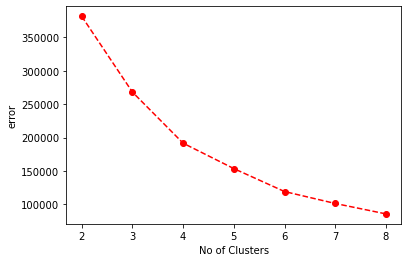

In [79]:
plt.plot(k,error, 'ro--')
plt.xlabel('No of Clusters')
plt.ylabel('error')

In [80]:
model = KMeans(n_clusters = 4)
model.fit(df)

KMeans(n_clusters=4)

In [81]:
mb=pd.Series(model.labels_)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6


# 10. Add the cluster data with the primary dataset

In [84]:
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.0,39,1
1,2,1,21,15.0,81,5
2,3,0,20,16.0,6,1
3,4,0,23,16.0,77,5
4,5,0,31,17.0,40,1


In [83]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120.00,79,7
196,197,0,45,126.00,28,2
197,198,1,32,126.00,74,7
198,199,1,32,60.55,18,2
199,200,1,30,60.55,83,7


# 11. Split the data into dependent and independent variables.

In [85]:
X=df.drop('Cluster',axis=1)
y=df['Cluster']
y

0      1
1      5
2      1
3      5
4      1
      ..
195    7
196    2
197    7
198    2
199    7
Name: Cluster, Length: 200, dtype: int32

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (160, 5)
Number transactions y_train dataset:  (160,)
Number transactions X_test dataset:  (40, 5)
Number transactions y_test dataset:  (40,)


# 12. Split the data into training and testing

In [89]:
X_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,0,49,54.0,42
197,198,1,32,126.0,74
38,39,0,36,37.0,26
24,25,0,54,28.0,14
122,123,0,40,69.0,58
...,...,...,...,...,...
106,107,0,66,63.0,50
14,15,1,37,20.0,13
92,93,1,48,60.0,49
179,180,1,35,93.0,90


In [90]:
X_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60.0,52
15,16,1,22,20.0,79
30,31,1,60,30.0,4
158,159,1,34,78.0,1
128,129,1,59,71.0,11
115,116,0,19,65.0,50
69,70,0,32,48.0,47
170,171,1,40,87.0,13
174,175,0,52,88.0,13
45,46,0,24,39.0,65


In [91]:
y_train

79     4
197    7
38     1
24     1
122    3
      ..
106    3
14     1
92     3
179    7
102    3
Name: Cluster, Length: 160, dtype: int32

In [92]:
y_test

95     3
15     5
30     1
158    6
128    6
115    3
69     4
170    2
174    2
45     5
66     4
182    2
165    7
78     4
186    2
177    7
56     4
152    6
82     4
68     4
124    6
16     1
148    6
93     3
65     4
60     4
84     3
67     4
125    0
132    6
9      5
18     1
55     4
75     4
150    6
104    3
135    0
137    0
164    2
76     4
Name: Cluster, dtype: int32

# 13. Build the Model

In [93]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

# 14. Train the Model

In [95]:
y_pred = model.predict(X_train)
y_pred

array([3, 7, 1, 1, 3, 3, 5, 5, 0, 4, 7, 0, 5, 6, 3, 4, 6, 3, 2, 3, 7, 3,
       5, 1, 5, 3, 1, 7, 4, 6, 4, 0, 2, 5, 3, 7, 1, 0, 3, 7, 1, 4, 4, 7,
       7, 3, 7, 1, 2, 4, 1, 0, 3, 5, 5, 2, 7, 1, 5, 3, 1, 1, 2, 0, 3, 2,
       1, 4, 3, 6, 2, 1, 2, 0, 4, 0, 4, 1, 0, 1, 1, 3, 0, 2, 5, 5, 2, 0,
       4, 5, 2, 4, 3, 6, 4, 2, 5, 3, 4, 0, 2, 6, 7, 4, 4, 1, 5, 3, 3, 3,
       6, 7, 3, 1, 5, 4, 7, 0, 5, 4, 7, 2, 0, 7, 4, 4, 3, 4, 2, 4, 4, 4,
       5, 4, 6, 2, 0, 5, 7, 3, 5, 4, 0, 6, 0, 3, 3, 3, 3, 4, 3, 7, 1, 2,
       4, 3, 1, 3, 7, 3])

In [96]:
model.score(X_train,y_train)

0.85625

# 15. Test the Model

In [97]:
y_pred = model.predict(X_test)
y_pred

array([3, 5, 1, 2, 6, 7, 4, 2, 6, 5, 4, 2, 0, 4, 6, 7, 4, 6, 3, 4, 2, 1,
       2, 3, 4, 4, 0, 4, 0, 2, 5, 1, 4, 4, 6, 3, 0, 0, 6, 4])

In [98]:
model.score(X_test,y_test)

0.725

# 16. Measure the performance using Evaluation Metrics.

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred1 = model.predict(X_train)

accuracy_score(y_train,y_pred1)

0.85625

In [100]:
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  3,  0,  0,  0,  1],
       [ 0,  0,  0,  1, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [101]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,3,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0
2,0,0,2,0,0,0,3,0
3,1,0,0,3,0,0,0,1
4,0,0,0,1,11,0,0,0
5,0,0,0,0,0,3,0,0
6,0,0,4,0,0,0,3,0
7,1,0,0,0,0,0,0,1


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         3
           2       0.33      0.40      0.36         5
           3       0.75      0.60      0.67         5
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00         3
           6       0.50      0.43      0.46         7
           7       0.50      0.50      0.50         2

    accuracy                           0.73        40
   macro avg       0.71      0.73      0.71        40
weighted avg       0.74      0.72      0.73        40

